In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv('data/rossmann-store-sales/store.csv')
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [53]:
df1 = pd.read_csv('data/rossmann-store-sales/new_train.csv', index_col=[0], dtype={"StateHoliday": object})
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [54]:
df1["StateHoliday"].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864627 entries, 0 to 864626
Data columns (total 9 columns):
Store            864627 non-null int64
DayOfWeek        864627 non-null int64
Date             864627 non-null object
Sales            864627 non-null int64
Customers        864627 non-null int64
Open             864627 non-null int64
Promo            864627 non-null int64
StateHoliday     864627 non-null object
SchoolHoliday    864627 non-null int64
dtypes: int64(7), object(2)
memory usage: 66.0+ MB


In [28]:
df1["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [33]:
df1["StateHoliday"].isna().any()

False

In [49]:
df1["StateHoliday"].astype(str, inplace=True)
df1["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [52]:
type(df1["StateHoliday"].unique()[0])

str

In [44]:
df1[df1["StateHoliday"] == 0].min()

Store                     1
DayOfWeek                 1
Date             2014-01-19
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
dtype: object

In [43]:
df1[df1["StateHoliday"] == '0'].min()

Store                     1
DayOfWeek                 1
Date             2013-05-17
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
dtype: object

In [38]:
df1[df1["StateHoliday"] == '0'].tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
864622,168,5,2013-05-17,7961,773,1,1,0,0
864623,169,5,2013-05-17,8931,879,1,1,0,0
864624,170,5,2013-05-17,6343,619,1,1,0,0
864625,171,5,2013-05-17,8733,941,1,1,0,0
864626,172,5,2013-05-17,6592,861,1,1,0,0


In [9]:
df1 = pd.read_csv('data/rossmann-store-sales/new_train.csv', index_col=[0])
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
df["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [12]:
np.unique(df[['Assortment', 'StoreType']].values)

array(['a', 'b', 'c', 'd'], dtype=object)

/home/bastian/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/bastian/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


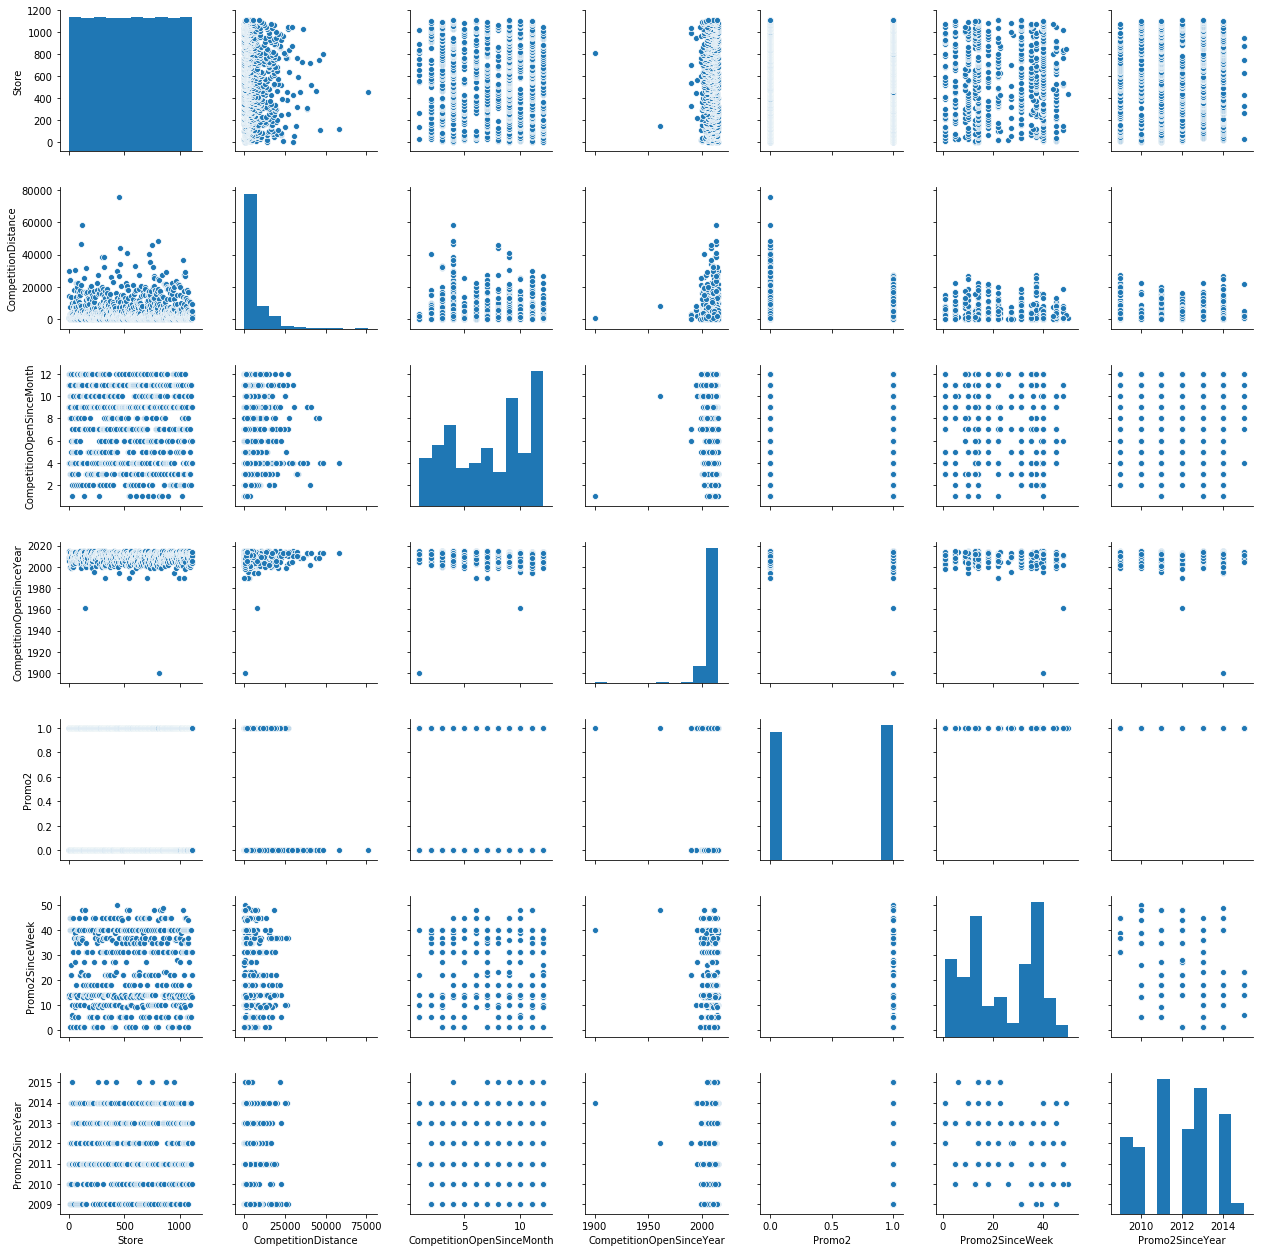

In [17]:
sns.pairplot(df)

In [24]:
plt.hist(df1["Sales"], df1["promo"])

KeyError: 'promo'

[]

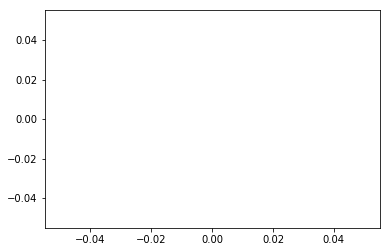

In [26]:
plt.plot(df1["Sales"], df1[""] kind="hist")

In [55]:
pwd

'/home/bastian/Schreibtisch/Data_Science/Data_Science_Retreat/mini_competition/DSR_Mini_Competition'